## Practical Session 1: Data exploration and regression algorithms

### The Task

We are given a dataset that contains a range of attributes describing the houses in California. The task is to predict the **median price of a house** given the attributes.

So we need to train an ML model on the data, and be able to predict from unseen data.

Some key questions to consider before beginning an ML project:
 - **Supervised vs Unsupervised**: Supervised projects require annotated data, and use techniques such as classification and regression. Unsupervised projects don't use annotated data, with clustering being a common method used.
 - **Discrete vs Continuous Values to Predict**: If they are discrete, we predict from a set of possible outcomes implying a classification approach. If the values are continuous, we need to just predict as close to the real ouput value as possible, implying a regression approach.
 - **Which ML Technique is most suitable**: The above factors usually help a lot with this.
 

## Step 1: Uploading and inspecting the data

First we read in the data:

In [121]:
import pandas as pd
import os

def load_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_data("housing/")

Now we can investigate the data with various built in functions:

$\textit{DataFrame.head()}$ shows the first few rows of the dataset, giving us insight into what the data looks like

In [122]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---

### Question 1: How many attributes does the dataset contain?
The dataset has 10 columns, so excluding the target variable (median_house_value), the dataset has 9 attributes to be used for prediction and 10 in total.

---

$\textit{DataFrame.info()}$ tells us some extra information, such as the number of columns and rows, and the types of each attribute

In [123]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Especially for **categorical** attributes, $\textit{DataFrame[column].value_counts()}$ can be useful for seeing what type of values the column takes, and what the distribution of these values is.

In [124]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The above suggests that the values are categorical: there are $5$ categories that define ocean proximity. ML algorithms prefer to work with numerical data, besides all the other attributes are represented using numbers. Keep that in mind, as this suggests that you will need to cast the categorical data as numerical.

$\textit{DataFrame.describe()}$ gives some extra data on each column individually, including a count of non-null entries, the mean value, standard deviation, min, max etc.

In [125]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---

### Question 2: How can you interpret the values in the table above? What do the percentiles tell you about the distibution of values in this dataset? How are the missing values handled?
The count is the number of non-null values for that column in the dataset (for total_bedrooms, only 20433 entries have a value, meaning over 200 values are null). The mean, min, max and standard deviation are all as named for each individual column. 

The 25%, 50%, and 75% rows represent the quartile values, i.e. 25% represents the value at which 25% of data is below this value. So 25% of the total_bedrooms per sub-regions of California are between 1 and 296. Since the maximum is around 6445, for total_bedrooms it implies most values are in the lower portion of the range.

NaN values are completely ignored for calculations (expect of course the count row).

---

Another good way to get an overview of data is by plotting histograms:

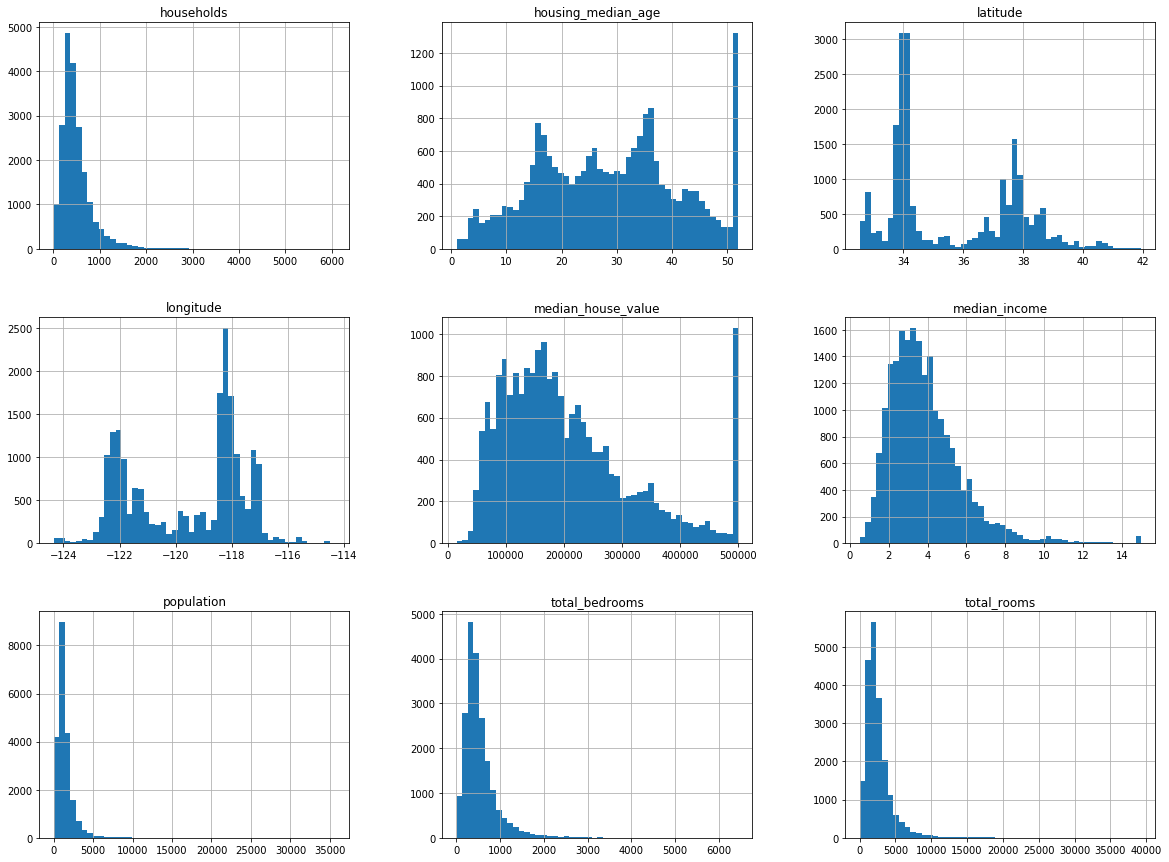

In [126]:
%matplotlib inline 
#so that the plot will be displayed in the notebook
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

A couple key observations worth noting about these histograms:

The $\textit{median_income, housing_median_age}$ and the $\textit{median_house_value}$ have been capped by the team that collected the data: that is, the values for median_income are scaled by dividing the income by $10000$ and capped so that they range between $[0.4999, 15.0001]$ with the incomes lower than $0.4999$ and higher than $15.0001$ binned together; similarly, the <em>housing_median_age</em> have been scaled and binned to range between $[1, 52]$ years and the <em>median_house_value</em> – to range between $[14999, 500001]$. 

Data manipulations like these are not unusual in data science but it's good to be aware of how the data is represented.

Also, several other attributes are "tail heavy" – they have a long distribution tail with many decreasingly rare values to the right of the mean. **In practice that means that you might consider using the logarithms of these values rather than the absolute values**.

## Step 2: Splitting the data into training and test sets

First we set the test set aside and use it to evaluate the performance of your model only - this is typically $20\%$ of the data.

We train and tune your model using the rest of the dataset – training set – and evaluate the performance of the model trained this way on the test set. Since the model doesn't see the test set during training, this perfomance should give you a reasonable estimate of how well it should perform on new data. 

Traditionally we also make sure that the test instances are selected randomly so that we don't end up with some biased selection, resulting in over-optimistic or over-pessimistic results on your test set.

To ensure random selection of the test items, use $\textit{np.random.permutation}$. However, if you want to ensure that you have a stable test set and the same test instances get selected from the dataset in a random fashion in different runs of the program, select a random seed, e.g. using $\textit{np.random.seed(42)}$.

We could write this code manually as below:

In [127]:
import numpy as np
np.random.seed(42)

def split_train_test(data, test_ratio):    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "training instances +", len(test_set), "test instances")

16512 training instances + 4128 test instances


However scikit-learn provides a similar functionality to the code above with its train_test_split function. Moreover, you can pass it several datasets with the same number of rows each, and it will split them into training and test sets **on the same indices** (you might find it useful if you need to pass in a separate DataFrame with labels):

In [128]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "training instances +", len(test_set), "test instances")

16512 training instances + 4128 test instances


However, if your dataset is not very large and the **data is skewed** on some of the attributes or on the target label (as is often the case with the real-world data), random sampling might introduce a **sampling bias**. **Stratified sampling** is a technique that helps make sure that the **distributions of the instance attributes or labels in the training and the test sets are similar**, meaning that the **proportion of instances drawn from each stratum in the dataset is similar** in the training and test data.

Simply put, we split by **distribution** so we get **similar actual number of points from each sub-range**, rather than evenly splitting the actual range and ending up with few points in some sub-ranges in the training set, meaning the model won't be very good at predicting values in that range.

First, to limit the number of income categories (strata), particularly at the long tail, let's apply further binning to the income values: e.g., you can divide the income by $1.5$, round up the values using ceil to have discrete categories (bins), and merge all the categories greater than $5$ into category $5$. The latter can be achieved using Pandas' where functionality, keeping the original values when they are smaller than $5$ and converting them to $5$ otherwise:

This is done because if after dividing by $1.5$, they're still greater than $5$, then they were greater than $7.5$ originally, which from $\textit{housing.describe()}$ is beyond the $75$ percentile mark (which ranges from $4.9$ to $25$ ish, and such we want to put all these values together, despite the fact this is technically a majority of the numerical range - it is a small percentage of where the actual data lies)

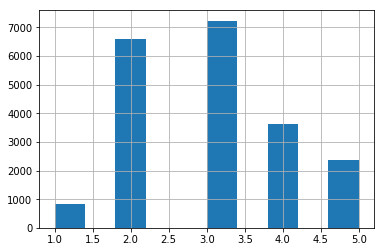

In [129]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True) # if less than 5, keep, else set to 5

housing["income_cat"].hist()
plt.show()

Now you have a much smaller number of categories of income, with the instances more evenly distributed, so you can hope to get enough data to represent the tail. 

Next, let's split the dataset into training and test sets making sure both contain similar proportion of instances from each income category. I.e. now that we've grouped the data in a better way, we want to give around 80% of each category to the training set, and the remaining 20% to the test set. This ensures each set is equally represented with regard to the data.

We can do that using scikit-learn's $\textit{StratifiedShuffleSplit}$ specifying the condition on which the data should be stratified (in this case, income category):

In [130]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's compare the distribution of the income values in the randomly selected train and test sets and the stratified train and test sets against the full dataset. 

To better understand the effect of random sampling versus stratified sampling, let's also estimate the error that would be introduced in the data by such splits:

In [131]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified tr": income_cat_proportions(strat_train_set),
    "Random tr": income_cat_proportions(train_set),
    "Stratified ts": income_cat_proportions(strat_test_set),
    "Random ts": income_cat_proportions(test_set),
})
compare_props["Rand. tr %error"] = 100 * compare_props["Random tr"] / compare_props["Overall"] - 100
compare_props["Rand. ts %error"] = 100 * compare_props["Random ts"] / compare_props["Overall"] - 100
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

compare_props.sort_index()

,Overall,Stratified tr,Random tr,Stratified ts,Random ts,Rand. tr %error,Rand. ts %error,Strat. tr %error,Strat. ts %error
1.0,0.039826,0.039850,0.039729,0.039729,0.040213,-0.243309,0.973236,0.060827,-0.243309
2.0,0.318847,0.318859,0.317466,0.318798,0.324370,-0.433065,1.732260,0.003799,-0.015195
3.0,0.350581,0.350594,0.348595,0.350533,0.358527,-0.566611,2.266446,0.003455,-0.013820
4.0,0.176308,0.176296,0.178537,0.176357,0.167393,1.264084,-5.056334,-0.006870,0.027480
5.0,0.114438,0.114402,0.115673,0.114583,0.109496,1.079594,-4.318374,-0.031753,0.127011


From the errors we can see that the Stratified sets have a much lower error % than the random sets (where error is measured from the actual data distributions - i.e. we want the test-train split to create 2 sets that as best as possible resemble the distributions in the raw data). 

The big differences can be seen between the test_split proportions, especially for group 4, with almost 1% of a difference.

Note, that to help you split the data, you had to introduce a new category – income_cat – which contains the same information as the original attribute median_income binned in a different way.

This can be shown by again calling .info():

In [132]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


So let's remove this column so the data can return to its original state

In [133]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


## Step 3: Exploring the attributes

The next step is to look more closely into the attributes and gain insights into the data. For example:
 - Which attributes look most informative?
 - How do they correlate with each other and the target label?
 - Is any further normalisation or scaling needed?

The best ways to do this is by visualising the data and by collecting additional statistics on the attributes and their relations to each other.

We will only work on the training set here, since the test set is saved for the end of the project for **evaluations only**

We'll create a copy of the training set so we can mess around with it without a worry of harming the original data.

In [134]:
housing = strat_train_set.copy()

Let's first investigate the first two columns: Longitude and Latitude. We'll do this with a scatter plot. The aplha value is used to highlight high density areas.

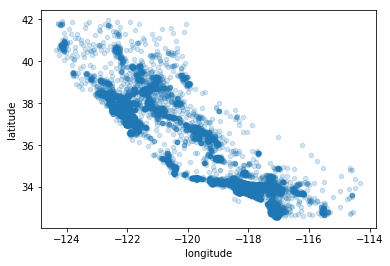

In [135]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

To get some further insight, we'll apply some sort of 'hue' or 'code' to the plot, using the following scheme: The size of the circles represents the size of the population, and the color represents the price, ranging from blue for low prices to red for high prices (this color scheme is specified by the preselected cmap type):

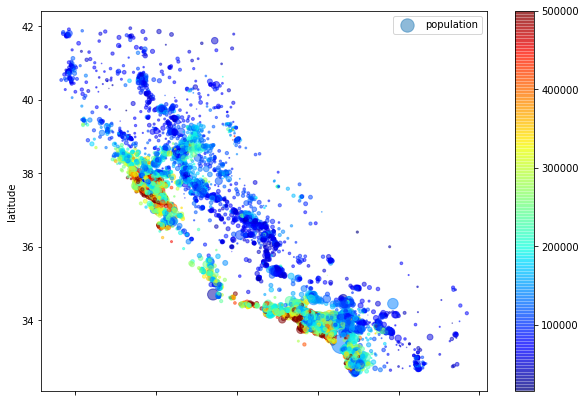

In [136]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
            s=housing["population"]/100, label="population", figsize=(10,7), 
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar="True",
            )
plt.legend()

This implies we have higher priced homes around the costal areas, with more densely populated areas also tending to cost more. These insights are useful for when we build a predictive model.

We can also look at how the attributes actually **correlate** with eachother. However we're only really interested in what correlates with the $\textit{median_house_price}$ (since this is the target variable). So we'll create a correlation matrix, take only the useful column and then sort them so we can see which columns are the **most** or **least** useful:

In [137]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

This shows that $\textit{median_income}$ is most strongly positively correlated with the price.

There's also a very small positive correlation between $\textit{total_bedrooms}$ and price, implying that the price of a house goes up a little with an increase in the number of bedrooms. A similar insight can be seen for every attribute thanks to this correlation matrix.

We could also plot the correlations, allowing us to more usefully visualise it (note that the diagonals will obviously have a correlation of 1, and so pandas instead of wasting the space, puts the histogram of the respective attribute in the slot).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efedc0a6be0>,
      dtype=object)

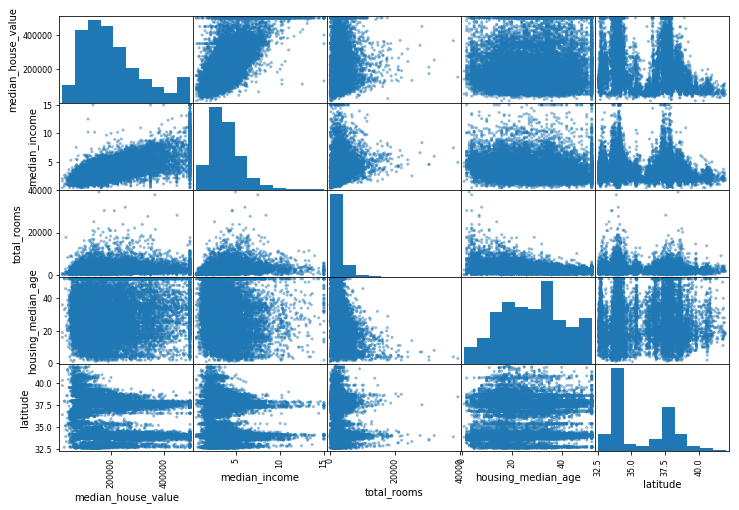

In [138]:
from pandas.plotting import scatter_matrix
# If the above returns an error, use the following:
#from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix(housing[attributes], figsize=(12,8))

Both the plots and the correlation coefficients confirm that the income attribute is the most promising one for predicting house prices, so let's zoom in on this attribute:

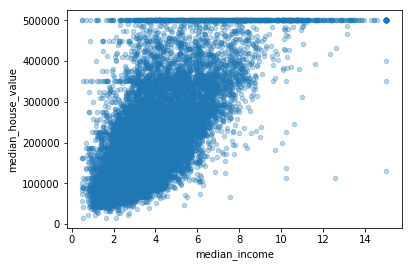

In [139]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)

A few key things can be seen from this plot:
 - The correlation is clearly quite strong
 - The data was scaled beyond a certain median_house_value, replacing all values beyond 500000 with 500000 when the data was being collected.
 - There may also be some less obvious grouping happening around 350000 (and maybe also 450000). Since any ML algorithm will learn to reproduce such data quirks, we might consider looking into these matters further and removing these districts from our dataset.
 
 
Another thing we notice is that some of the attributes (namely $\textit{total_rooms}$, $\textit{total_bedrooms}$ and $\textit{population}$) do not actually describe each house in particular but rather represent the cumulative counts for *all households* in the block group. Remember, we're trying to estimate the price of **individual** houses.

So we should instead turn each into a **per-household** column, by dividing by the number of households per block:

In [140]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]
housing["population_per_household"] = housing["population"] / housing["households"]

In addition, an attribute that measures the proportion of bedrooms against the total number of rooms might be informative:

In [141]:
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]

A good way to check whether these transformations have any effect on the task is to check attributes correlations again

In [142]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

We can see here that both $\textit{rooms_per_household}$ and $\textit{bedrooms_per_rooms}$ have better correlations with the price than most other attributes.

## Step 4: Data preparation and transformations for machine learning algorithms

Now we need to do some final finishing touches to the data, clean it up and get it in a useful format for the ML Algorithms.

We'll first separate the target variable from the features, so we can apply any changes to each set seperately.

In [143]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

We should also add the useful features we engineered earlier to this set, with the following function:

In [144]:
def add_features(data):
    # add the transformed features that you found useful before
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["bedrooms_per_rooms"] = data["total_bedrooms"] / data["total_rooms"]
    data["population_per_household"] = data["population"] / data["households"]
    
#add_features(housing)

### Handling Missing Values

From earlier we saw that the $\textit{total_bedrooms}$ column had some missing values. We have 3 possible solutions for fixing this, since ML algorithms cannot work with missing values:
 - Remove Rows with missing entries
 - Remove Columns with missing entries
 - Replace missing entries with some sort of mean or median value
 
Options 1 and 2 obviously delete data, which is usually not favourable. So we go with option 3. We will use the median so we don't need to worry about outliers etc. 

Note that we want to calculate the median from the **training set**, and apply it to any incoming data that could also have missing values. Therefore it would be useful to calculate and store medians for **every column**, so that we can fill in any missing values on inputs to the model for future evaluation.

In [145]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

We can also calculate and store median values using sklearn (note that we'll exclude $\textit{ocean_proximity}$ attribute from this calculation since it has non-numerical values):

In [146]:
from sklearn.preprocessing import Imputer 

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

You can check the median values stored in the imputer as follows:

In [147]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

And also make sure that they exactly coincide with the median values for all numerical attributes:

In [148]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Finally, let's replace the missing values in the training data:

In [149]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


### Handling textual and categorical attributes

The $\textit{ocean_proximity}$ column is not numerical, it is categorical. Therefore we need a way to map these categories to numbers. The simplest way to do this is using sklearns $\textit{LabelEncoder}$ to simply attach a number to each category:

In [150]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

However there's a problem with this: It assumes the numbers are somehow related. For example how 2 is double the size of 1, but in terms of categories this makes no sense at all. So this system doesn't work for this.

Instead we use a concept called **one-hot encoding** which works as follows: for each category, it creates a separate binary attribute which is set to $1$ (hot) when the category coincides with the attribute, and $0$ (cold) otherwise. So for instance, sklearn's functionality allows us to convert categorical values into one-hot vectors:

In [151]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# fit_transform expects a 2D array, but housing_cat_encoded is a 1D array.
# Reshape it using NumPy's reshape functionality where -1 simply means "unspecified" dimension 
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>


Note that the data format above says that the output is a sparse matrix. This means that the data structure only stores the location of the non-zero elements, rather than the full set of vectors which are mostly full of zeros.

To see the actual format of the one-hot encoding output, we can just cast it to an array:

In [152]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

As you can see, each row only has a single entry in it corresponding with the category that $\textit{ocean_proximity}$ fell into. This has created 5 new data columns.

Now putting it all together: Everything above, including casting text categories to numerical categories and then converting them into 1-hot vectors can be done with sklearn's $\textit{LabelBinarizer}$:

In [153]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer(sparse_output=True) # by default this is false and it returns an array
housing_cat_1hot = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Data transformers

A useful functionality of sklearn is data transformers: you will see them used in preprocessing very often. For example, you have just used one to impute the missing values. In addition, you can implement your own custom data transformers. In general, a transformer class needs to implement three methods:

 - A constructor method
 - A fit method that learns parameters
 - A tranform method that applies the learned transformation to the new data
 
Here is how you can implement a data tranformer that will convert categorical values into 1-hot vectors:

In [154]:
from sklearn.base import TransformerMixin # TransformerMixin allows you to use fit_transform method

class CustomLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs) # since the LabelBinarizer does everything described above
    
    def fit(self, X, y=0):
        self.encoder.fit(X)
        return self
    
    def transform(self, X, y=0):
        return self.encoder.transform(X)

Similarly, here is how you can wrap up adding new transformed features (like bedroom-to-room ratio) with a data transformer:

In [155]:
from sklearn.base import BaseEstimator, TransformerMixin 
# BaseEstimator allows you to drop *args and **kargs from you constructor
# and, in addition, allows you to use methods set_params() and get_params()

rooms_id, bedrooms_id, population_id, household_id = 3, 4, 5, 6 # represents the row of the relevant data

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms = True): # note no *args and **kargs used this time
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # note X[:, k] takes all rows with the :, then takes the k-th column with k
        rooms_per_household = X[:, rooms_id] / X[:, household_id] # 2 vectors dividing pairwise values
        bedrooms_per_household = X[:, bedrooms_id] / X[:, household_id]
        population_per_household = X[:, population_id] / X[:, household_id]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_rooms = X[:, bedrooms_id] / X[:, rooms_id]
            return np.c_[X, rooms_per_household, bedrooms_per_household, 
                         population_per_household, bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_household, bedrooms_per_household, 
                         population_per_household] # np.c_ concatenates these columns into one big array
        
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 1.0353982300884956, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 0.9557522123893806,
        2.7079646017699117, 0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 1.0194805194805194, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 1.1398692810457516, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 1.0674157303370786, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 1.0672926447574336,
        1.9859154929577465, 0.22035541195476574]], dtype=object)

If you'd like to explore the new attributes, you can convert the check the housing_extra_attribs into a Pandas DataFrame and apply the functionality as before, for example using .head() or .info():

In [156]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+
                                     ["rooms_per_household", "bedrooms_per_household", 
                                      "population_per_household", "bedrooms_per_rooms"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household,bedrooms_per_rooms
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,1.0354,2.0944,0.223852
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,0.955752,2.70796,0.159057
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,1.01948,2.02597,0.241291
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,1.05099,4.13598,0.200866
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,1.04238,3.04785,0.231341


### Feature Scaling

Finally, ML algorithms do not typically perform well when the feature values cover significantly different range of values. For example, in the dataset at hand, the income ranges from $0.4999$ to $15.0001$, while population ranges from $3$ to $35682$. Taken at the same scale, these values are not directly comparable. The data transformation that should be applied to these values is called **feature scaling**.

One of the most common ways to scale the data is to apply **min-max scaling** (also often referred to as **normalisaton**). Min-max scaling puts all values on the scale of $[0, 1]$ making the ranges directly comparable. For that, you need to subtract the min from the actual value and divide by the difference between the maximum and minimum values, i.e.:

$$
f_{scaled} = \frac{f - F_{min}}{F_{max} - F_{min}}
$$

where $f \in F$ is the actual feature value of a feature type $F$, and $F_{min}$ and $F_{max}$ are the minumum and maximum values for the feature of type $F$.

$\textit{Scikit-learn}$ has an implementation for the $\textit{MinMaxScaler}$

Another common approach is **standardisation**, which subtracts the mean value (so the standardised values have a zero mean) and divides by the variance (so the standardised values have unit variance). Standardisation *does not impose a specific range* on the values and is *more robust to the outliers*: i.e., a noisy input or an incorrect income value of $100$ (when the rest of the values lie within the range of $[0.4999, 15.0001]$) will introduce a significant skew in the data after min-max scaling - **this is important**).

$\textit{Scikit-learn}$ has an implementation for the $\textit{StandardScaler}$, as well as other scaling approaches.

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
housing_tr_scaled = scaler.fit_transform(housing_tr)

### Putting all the data transformations together

Another useful functionality of sklearn is **pipelines**. 

These allow you to stack several separate transformations together. For example, you can apply the numerical transformations such as missing values handling and data scaling as follows:

In [158]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 8)

Pipelines are useful because they help combining several steps together, so that the output of one data transformer (e.g., $Imputer$) is passed on as an input to the next one (e.g., $StandardScaler$) and so you don't need to worry about the intermediate steps. Besides, it makes the code look more concise and readable.

However:
 - The current pipeline doesn't handle categorical values
 - Pipeline expects Numpy arrays, not the DataFrames we use because they're easier for inspection etc
 
First we create a custom data transformer that allows you to select custom attributes from a DataFrame, returning the ones we want as a Numpy array

In [159]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

This is quite useful because now you can select the numerical attributes and apply one set of transformations to them, and then select categorical attributes and apply another set of tranformation to them, i.e.:

In [160]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', CustomLabelBinarizer()),
    ])

Finally, to merge the output of the two separate data transformers back together, you can use sklearn's FeatureUnion functionality: it runs the two pipelines' fit methods and the two tranform methods in parallel, and then concatenates the output. I.e.:

In [161]:
from sklearn.pipeline import FeatureUnion
# pipeline for all numerical columns: scales, fills in missing values, adds attributes
# pipeline for all categorical columns: select them and applies one-hot encoding
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline), 
        ("cat_pipeline", cat_pipeline),
    ])


housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

housing_prepared = full_pipeline.fit_transform(housing) # applies the pipelines to the data
print(housing_prepared.shape)
housing_prepared

(16512, 17)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Step 5: Implementation, evaluation and fine-tuning of a regression model

### Training and evaluating the model

Let's train a Linear Regression model first. During training, a Linear Regression model tries to find the optimal set of weights $w=(w_{1}, w_{2}, ..., w_{n})$ for the features (attributes) $X=(x_{1}, x_{2}, ..., x_{n})$ by minimising the residual sum of squares between the responses predicted by such linear approximation $Xw$ and the observed responses $y$ in the dataset.

In [162]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

First, let's try the model on some instances from the training set itself:

In [163]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
# note the use of transform, as you'd like to apply already learned (fitted) transformations to the data
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", list(lin_reg.predict(some_data_prepared)))
print("Actual labels:", list(some_labels))

Predictions: [209255.56837821112, 316024.2524890247, 209614.6647598605, 58638.55109778917, 186723.33486566014]
Actual labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


The above shows that the model is able to predict some price values, however they don't seem to be very accurate.

Let's instead calculate **RMSE: Root Mean Squared Error**

$$
RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^{2}}
$$
where $m$ is the number of instances, $h$ is the model (hypothesis), $X$ is the matrix containing all feature values, $x^{(i)}$ is the feature vector describing instance $i$, and $y^{(i)}$ is the actual label for instance $i$. **Note that it gives a higher error weight to larger errors**

Because RMSE is highly influenced by the outliers (i.e., large errors), in some situations **Mean Absolute Error (MAE)** is preferred. You may note that its estimation is somewhat similar to the estimation of RMSE:

$$
MAE(X, h) = \frac{1}{m} \sum_{i=1}^{m} |h(x^{(i)}) - y^{(i)}|
$$
Let's measure the performance of the linear regression model using these error estimations:

In [164]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68226.59728659761

Given that the majority of the districts' housing values lie somewhere between $[\$100000, \$300000]$ an estimation error of over $68000$ is very high. This shows that the regression model underfits the training data: it doesn't capture the patterns in the training data well enough

The ways to fix this include:

 - using more features and/or more informative features, for example applying log to some of the existing features to address the long tail distributions;
 - using more complex models;
 - reducing the constraints on the model.
 
We could try using **Polynomial Regression**, which applies a data change as the **preprocessing** stage, and still uses a Linear model for predictions:

In [171]:
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

model = model.fit(housing_prepared, housing_labels)
housing_predictions = model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Degree 2: " + str(59896.625302502296))
print("Degree 3: {}".format(lin_rmse))

Degree 2: 59896.625302502296
Degree 3: 51339.093115982694


### Learning to better evaluate you model using cross-validation

There are two possible solutions to the problem of **overfitting** in very complex models. You can either reapply train_test_split function from Step 2 to set aside part of the training set as a development (or validation) set, and then train the model on the smaller training set and tune it on the development set, before applying your best model to the test set. Or you can use **cross-validation**.

With a *K-fold cross-validation* strategy, the training data gets randomly split into $k$ distinct subsets (splits). Then the model gets trained $10$ times, in each run being tested on a different fold and trained on the other $9$ folds. That way, the algorithm is evaluated on each data point in the training set, but during training is not exposed to the data points that it gets tested on later. The result is an array of $10$ evaluation scores, which can be averaged for better understanding and model comparison, i.e.:

In [172]:
from sklearn.model_selection import cross_val_score
    
def analyse_cv(model):   
    scores = cross_val_score(model, housing_prepared, housing_labels,
                             scoring = "neg_mean_squared_error", cv=10)

    # cross-validation expects utility function (greater is better)
    # rather than cost function (lower is better), so the scores returned
    # are negative as they are the opposite of MSE
    sqrt_scores = np.sqrt(-scores) 
    print("Scores:", sqrt_scores)
    print("Mean:", sqrt_scores.mean())
    print("Standard deviation:", sqrt_scores.std())

We can try this on a few model types (don't worry about them, they're just used to show the usefulness of cross-validation):

In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

tree_reg = DecisionTreeRegressor()
tree_reg = tree_reg.fit(housing_prepared, housing_labels)

print(analyse_cv(forest_reg))
print(analyse_cv(tree_reg))
print(analyse_cv(lin_reg))

Scores: [53604.32674432 51189.58229479 53754.66631115 55425.66830118
 51738.1879488  56012.02620827 50835.66680217 51534.80548437
 57009.81143855 52843.82267406]
Mean: 53394.85642076684
Standard deviation: 2052.6977108486512
Scores: [71615.14264098 67232.91181884 72213.79168681 72410.03439579
 69568.72436299 75400.97865166 71108.37447227 69820.84352365
 78932.6287773  70529.3768232 ]
Mean: 71883.28071534933
Standard deviation: 3101.5543913489387
Scores: [66400.11538513 66561.82084573 67510.6874652  74900.77582974
 67509.87374136 70884.73634886 64791.38470292 68141.40160344
 70934.13138413 67393.71765602]
Mean: 68502.86449625253
Standard deviation: 2789.5023965528344


### Fine-tuning the model

Some learning algorithms have hyperparameters – the parameters of the algorithms that should be set up prior to training and don't get changed during training.

The code below shows you how the best hyperparameter setting can be automatically found for an sklearn ML algorithm using a $GridSearch$ functionality. Let's use the example of $RandomForestRegressor$ and focus on specific hyperparameters: the number of helper algorithms (decision trees in the forest, or $\textit{n_estimators}$) and the number of features the regressor considers in order to find the most informative subsets of instances to each of the helper algorithms ($\textit{max_features}$):

In [174]:
from sklearn.model_selection import GridSearchCV

# specify the range of hyperparameter values for the grid search to try out 
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

You can also monitor the intermediate results as shown below. Note also that if the best results are achieved with the maximum value for each of the parameter speficied for exploration, so you might want to keep experimenting with even higher values to see if the results improve any further:

In [175]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

66066.48775379529 {'max_features': 2, 'n_estimators': 3}
56584.66451942707 {'max_features': 2, 'n_estimators': 10}
53488.558646698526 {'max_features': 2, 'n_estimators': 30}
61020.547205022995 {'max_features': 4, 'n_estimators': 3}
53415.21820418603 {'max_features': 4, 'n_estimators': 10}
51001.67597150322 {'max_features': 4, 'n_estimators': 30}
59121.52634647539 {'max_features': 6, 'n_estimators': 3}
52500.58116883959 {'max_features': 6, 'n_estimators': 10}
49922.13306293394 {'max_features': 6, 'n_estimators': 30}
59402.1635381058 {'max_features': 8, 'n_estimators': 3}
52234.6318364595 {'max_features': 8, 'n_estimators': 10}
50460.405113693 {'max_features': 8, 'n_estimators': 30}


One more insight you can gain from the best estimator is the importance of each feature (expressed in the weight the best estimator learned to assign to each of the features). Here is how you can do that:

In [177]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.62696147e-02, 6.77752363e-02, 4.06829212e-02, 1.66862339e-02,
       1.52443696e-02, 1.66914613e-02, 1.49583461e-02, 3.18354224e-01,
       6.63600586e-02, 2.10934898e-02, 1.02546259e-01, 6.58283957e-02,
       1.71534813e-02, 1.53151880e-01, 7.23066447e-05, 2.84179127e-03,
       4.28993088e-03])

If you also want to display the feature names, you can do that as follows:

In [178]:
extra_attribs = ['rooms_per_household', 'bedrooms_per_household', 'population_per_household', 'bedrooms_per_rooms']
cat_one_hot_attribs = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31835422363022564, 'median_income'),
 (0.15315188006253938, 'INLAND'),
 (0.10254625886084616, 'population_per_household'),
 (0.07626961474956721, 'longitude'),
 (0.06777523633810782, 'latitude'),
 (0.06636005863057896, 'rooms_per_household'),
 (0.06582839569527102, 'bedrooms_per_rooms'),
 (0.040682921173259376, 'housing_median_age'),
 (0.021093489769923722, 'bedrooms_per_household'),
 (0.017153481341409888, '<1H OCEAN'),
 (0.016691461258871054, 'population'),
 (0.016686233943034243, 'total_rooms'),
 (0.015244369618348234, 'total_bedrooms'),
 (0.014958346129614278, 'households'),
 (0.004289930884275016, 'NEAR OCEAN'),
 (0.0028417912694035114, 'NEAR BAY'),
 (7.230664472449129e-05, 'ISLAND')]

### Question: How do these compare to the insights gained earlier?

One very interesting thing about these insights is the categories of the $\textit{ocean_proximity}$ attribute. Earlier we discovered that the ocean_proximity seems to be an effective predictor